# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Hugo| secret |
|Mijntje| secret |
|Martijn|secret|
|Justin|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>



# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph

## **1. Een digraph laden en transformeren naar RDF database**
Hier nemen we als voorbeeld een familie en een LHBTI++ graph en maken er een RDF database van.

In [3]:
import rdflib
import networkx as nx
from rdflib import Namespace, Literal, URIRef
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD


def networkx2RDF(Graph):
    EX = Namespace("http://example.org/people/") 
    attribute = list(list(Graph.nodes(data=True))[0][1].keys())
    grafiek = rdflib.Graph()
    edges = []

    #toewijzen van classes (1-plaatsige relaties) a.d.h.v. attributen
    for node in Graph.nodes(data=True):
      for i in range(len(attribute)):
        insert_URI = node[1][attribute[i]]
        triple_object = URIRef(f"http://example.org/people/{insert_URI}")
        triple_subject = EX[node[0]]
        grafiek.add((triple_subject, RDF.type, triple_object))

    #toewijzen van properties (2-plaatsige relaties) a.d.h.v. edges 
    for edge in Graph.edges(data=True):
      relatie = edge[2].values()
      relatie = list(relatie)[0]
      s = EX[edge[0]]
      p = EX[relatie]
      o = EX[edge[1]]
      edges.append((s, p, o))
    for e in edges:
        grafiek.add(e)
    return grafiek

Hieronder ze je de networkx graphs die gebruikt gaan worden voor deze opdracht.

In [4]:
#LHBTIQ+ netwerk 
H = nx.DiGraph()

H.add_edges_from([('Ron', 'Hermione'), ('Harry', 'Ginny'), ('Dumbledore', 'Grindelwald'), ('Bellatrix', 'Nymphadora'), ('Bellatrix', 'Remus'), ('Nymphadora', 'Bellatrix'), ('Nymphadora', 'Remus'), ('Narcissa', 'Lucius'), ('Lucius', 'Narcissa'), ('Cedric', 'Harry'), ('Luna', 'Hermione'), ('Minerva', 'Dumbledore'), ('Cho', 'Cedric'), ('Molly', 'Arthur'), ('Harry', 'Hermione')])

M,V,T,I = {'Ron', 'Harry', 'Dumbledore', 'Grindelwald', 'Remus', 'Lucius', 'Cedric', 'Arthur'}, {'Hermione', 'Ginny', 'Bellatrix', 'Nymphadora', 'Narcissa', 'Luna', 'Molly'}, {'Minerva'}, {'Cho'}

for n in M:
    H.nodes[n]['geslacht']='Male'
    
for n in V:
    H.nodes[n]['geslacht']='Female'
    
for n in T: 
    H.nodes[n]['geslacht']= 'Transgender'
    
for n in I: 
    H.nodes[n]['geslacht']='Intersex'
    
nx.set_edge_attributes(H, "IsAangetrokkenTot", "relatie")


#Familie netwerk
G= nx.DiGraph()
G.add_nodes_from(range(55))
namen = ['Anna', 'Jan', 'Anne', 'Piet', 'Aaltje', 'Johannes', 'Geertje', 'Gerrit', 'Helena', 'Dirk', 'Mathias', 'Marie', 'Jacob', 'Maria', 
                 'Herman', 'Ben', 'Barry', 'Ed', 'Joey', 'Willem', 'Amber', 'Annete', 'Sylvia', 'Gijs', 'Daan', 'Anna2', 'Nicole', 'Gerrit-Jan', 'Tineke',
                 'Alie', 'Gerrit2', 'Berta', 'Dick', 'Annemari', 'Martijn', 'Merel', 'Chiara', 'Rien', 'Tomas', 'George', 'Maria2', 'Viktor', 'Fenna', 'Bertine',
                 'Marlinde', 'Jarno', 'Joost', 'Bram', 'Marloes', 'Tom', 'Olivia', 'Kaj', 'Corien', 'David', 'Sofie']
F = [0,2,4,6,8,11,13,20,21,22,25,26,28,29,31,33,35,36,40,42,43,44,48,50,52,54]

G.add_edges_from([(0,8), (0,10), (0,11), (1,8), (1,10),(1,11),(2,12),(3,12),(4,13),(5,13),(6,14),(7,14),
                 (8,15),(8,16),(9,15),(9,16),(11,21),(11,22),(11,26),(12,21),(12,22),(12,26), 
                 (13,27),(13,30),(13,31),(13,33),(14,27),(14,30),(14,31),(14,33),(17,18),(19,20),(21,18),(21,20),
                 (22,24),(22,25),(23,24),(23,25),(26,34),(26,35),(27,34),(27,35),(27,37),(27,40),(27,43),
                 (28,37),(28,40),(28,43),(29,44),(29,48),(29,52),(30,44),(30,48),(30,52),
                 (36,38),(36,39),(37,38),(37,39),(44,46),(44,47),(45,46),(45,47),(48,50),(48,51),(49,50),(49,51),
                 (52,54),(53,54)])

nx.set_edge_attributes(G, "OuderVan", "relatie")

kleuren= []
for node in G.nodes:
    if node in F:
        kleuren.append('pink')
        G.nodes[node]['geslacht'] = 'Female'
    else:
        kleuren.append('blue')
        G.nodes[node]['geslacht'] = 'Male'
    G = nx.relabel_nodes(G, {node: namen[node]})

# nx.draw(G, node_color=kleuren, with_labels=True)

Nu we de netwerken hebben aangemaakt kunnen we deze omzetten tot rdf. Hiervoor gebruiken we de functie networkx2RDF(Networkx_Graph). Deze functie zal de nodes omzetten en edges omzetten tot de triples die gebruikt worden in RDF en kan ook de attributen op nodes omzetten.

In [5]:
#testcel voor familienetwerk

g = networkx2RDF(G)
print(g.serialize(format="n3").decode("utf-8"))

# for triple in g.triples((None,None,None)):
#     print(triple)

@prefix ns1: <http://example.org/people/> .

ns1:Aaltje a ns1:Female ;
    ns1:OuderVan ns1:Maria .

ns1:Alie a ns1:Female ;
    ns1:OuderVan ns1:Corien,
        ns1:Marlinde,
        ns1:Marloes .

ns1:Anna a ns1:Female ;
    ns1:OuderVan ns1:Helena,
        ns1:Marie,
        ns1:Mathias .

ns1:Anne a ns1:Female ;
    ns1:OuderVan ns1:Jacob .

ns1:Chiara a ns1:Female ;
    ns1:OuderVan ns1:George,
        ns1:Tomas .

ns1:David a ns1:Male ;
    ns1:OuderVan ns1:Sofie .

ns1:Dick a ns1:Male .

ns1:Dirk a ns1:Male ;
    ns1:OuderVan ns1:Barry,
        ns1:Ben .

ns1:Ed a ns1:Male ;
    ns1:OuderVan ns1:Joey .

ns1:Fenna a ns1:Female .

ns1:Geertje a ns1:Female ;
    ns1:OuderVan ns1:Herman .

ns1:Gerrit a ns1:Male ;
    ns1:OuderVan ns1:Herman .

ns1:Gijs a ns1:Male ;
    ns1:OuderVan ns1:Anna2,
        ns1:Daan .

ns1:Jan a ns1:Male ;
    ns1:OuderVan ns1:Helena,
        ns1:Marie,
        ns1:Mathias .

ns1:Jarno a ns1:Male ;
    ns1:OuderVan ns1:Bram,
        ns1:Joost .

ns1:Johann

Hieronder zetten we ook het LHBTIQI+ netwerk om naar RDF.

In [6]:
#testcel voor lhbtqi+ netwerk

l = networkx2RDF(H)
print(l.serialize(format="n3").decode("utf-8"))

@prefix ns1: <http://example.org/people/> .

ns1:Cho a ns1:Intersex ;
    ns1:IsAangetrokkenTot ns1:Cedric .

ns1:Luna a ns1:Female ;
    ns1:IsAangetrokkenTot ns1:Hermione .

ns1:Minerva a ns1:Transgender ;
    ns1:IsAangetrokkenTot ns1:Dumbledore .

ns1:Molly a ns1:Female ;
    ns1:IsAangetrokkenTot ns1:Arthur .

ns1:Ron a ns1:Male ;
    ns1:IsAangetrokkenTot ns1:Hermione .

ns1:Arthur a ns1:Male .

ns1:Bellatrix a ns1:Female ;
    ns1:IsAangetrokkenTot ns1:Nymphadora,
        ns1:Remus .

ns1:Cedric a ns1:Male ;
    ns1:IsAangetrokkenTot ns1:Harry .

ns1:Dumbledore a ns1:Male ;
    ns1:IsAangetrokkenTot ns1:Grindelwald .

ns1:Ginny a ns1:Female .

ns1:Grindelwald a ns1:Male .

ns1:Harry a ns1:Male ;
    ns1:IsAangetrokkenTot ns1:Ginny,
        ns1:Hermione .

ns1:Lucius a ns1:Male ;
    ns1:IsAangetrokkenTot ns1:Narcissa .

ns1:Narcissa a ns1:Female ;
    ns1:IsAangetrokkenTot ns1:Lucius .

ns1:Nymphadora a ns1:Female ;
    ns1:IsAangetrokkenTot ns1:Bellatrix,
        ns1:Remus .

n

Nu we twee netwerken hebben omgezet tot RDF, kunnen we hierop SPARQL queries op loslaten. De queries hebben de volgende structuur: "select ?x where {?x rdf:type ns1:Male}". Eerst kies je wat je wilt weten, in dit geval gebruiken we x. Vervolgens gebruiken we where {} om te bepalen waaraan elke x die we selecteren moet voldoen. In het voorbeeld willen we alle x die als type 'Male' hebben. Let bij het schrijven van je queries op dat er een ? komt voor elke variabele. 

Hieronder staan een aantal queries voor de verschillende familie relaties. Hierbij is het belangrijk om te onthouden dat de edges in onze oorsprongelijke Networkx DiGraph liepen van ouder naar kind. Wanneer je kijkt naar de query voor 'vader' snap je dan wat er gebeurt?

Je hebt misschien de '.' zien staan tussen de twee verschillende delen van 'where'. Eerst selecteren we alle ouders en dan selecteren we alle ouders die 'Male' zijn. De punt verbindt deze twee delen van de where en dient als een 'AND' voor de query. 

Wanneer je helemaal naar de onderkant van de SPARQL queries gaat zie je dat deze queries al vrij snel zeer ingewikkeld kunnen worden. Voor deze queries hebbben we ook FILTER() toegevoegd. Wanneer je deze filters niet toevoegd kan het gebeuren dat de verschillende variabelen in de queries dezelfde waardes hebben. In de query voor broer staat FILTER(?broer != ?person), voeg je dit niet toe dan kan het zijn dat je de broer van jezelf bent. Dit is omdat de computer, zonder filter, niet begrijpt dat ?broer en ?person verschillende personen moeten zijn. 

## **2. SPARQL queries voor familierelaties**

#### Vader
* "select ?parent ?person where { ?parent ns1:OuderVan ?person . ?parent rdf:type ns1:Male .}" 
   
#### Moeder 
* "select ?parent ?person where { ?parent ns1:OuderVan ?person . ?parent rdf:type ns1:Female .}"
 
#### Opa 
* "select ?grandparent ?person where { ?grandparent ns1:OuderVan ?parent . ?parent ns1:OuderVan ?person . ?grandparent rdf:type ns1:Male .}"
 
#### Oma 
* "select ?grandparent ?person where { ?grandparent ns1:OuderVan ?parent . ?parent ns1:OuderVan ?person . ?grandparent rdf:type ns1:Female .}"

#### Broer
* "select distinct ?broer ?person where { ?x ns1:OuderVan ?broer . ?x ns1:OuderVan ?person . ?y ns1:OuderVan ?broer . ?y ns1:OuderVan ?person . ?broer rdf:type ns1:Male FILTER (?broer != ?person)}"

#### Zus 
* "select distinct ?zus ?person where { ?x ns1:OuderVan ?zus . ?x ns1:OuderVan ?person . ?y ns1:OuderVan ?zus . ?y ns1:OuderVan ?person . ?zus rdf:type ns1:Female FILTER(?zus != ?person)} "

#### Zoon 
* "select ?kind ?person where {?person ns1:OuderVan ?kind . ?kind rdf:type ns1:Male}"

#### Dochter
* "select ?kind ?person where {?person ns1:OuderVan ?kind . ?kind rdf:type ns1:Female}"


#### Oom
* "select distinct ?oom ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?grootouder ns1:OuderVan ?oom . ?oom rdf:type ns1:Male}"

#### Tante 
* "select distinct ?tante ?person where{?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?grootouder ns1:OuderVan ?tante . ?tante rdf:type ns1:Female}"

#### Nicht  
*Dit zijn de dochters van je ooms en tantes*  
* "select distinct ?nicht ?person where {?ouder ns1:OuderVan ?person .  ?grootouder ns1:OuderVan ?ouder . ?grootouder ns1:OuderVan ?oom . ?oom ns1:OuderVan ?nicht . ?nicht rdf:type ns1:Female FILTER (?nicht != ?person && ?oom != ?ouder)}"

#### Neef 
*Dit zijn de zoons van je ooms en tantes*
* "select distinct ?neef ?person where {?ouder ns1:OuderVan ?person .  ?grootouder ns1:OuderVan ?ouder . ?grootouder ns1:OuderVan ?oom . ?oom ns1:OuderVan ?neef . ?neef rdf:type ns1:Male FILTER (?neef != ?person && ?oom != ?ouder)}"

#### Overgrootvader 
* "select ?ogv ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogv ns1:OuderVan ?grootouder . ?ogv rdf:type ns1:Male}"

#### Overgrootmoeder 
* "select ?ogm ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogm ns1:OuderVan ?grootouder . ?ogm rdf:type ns1:Female}"

#### Oudoom 
* "select ?oudoom ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogo ns1:OuderVan ?grootouder . ?ogo ns1:OuderVan ?oudoom . ?oudoom rdf:type ns1:Male}"

#### Oudtante
* "select ?oudtante ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogo ns1:OuderVan ?grootouder . ?ogo ns1:OuderVan ?oudtante . ?oudtante rdf:type ns1: Female}"

#### Achterneef 
* "select distinct ?achterneef ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogo ns1:OuderVan ?grootouder . ?ogo ns1:OuderVan ?oudoom . ?oudoom ns1:OuderVan ?achterneef . ?achterneef rdf:type ns1:Male}"

#### Achternicht
* "select distinct ?achternicht ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogo ns1:OuderVan ?grootouder . ?ogo ns1:OuderVan ?oudtante . ?oudtante ns1:OuderVan ?achternicht . ?achternicht rdf:type ns1:Female}"

#### Achterachterneef 
* "select DISTINCT ?achterachterneef ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogo ns1:OuderVan ?grootouder . ?ogo ns1:OuderVan ?oudoom . ?oudoom ns1:OuderVan ?achterneef . ?achterneef ns1:OuderVan ?achterachterneef . ?achterachterneef rdf:type ns1:Male . FILTER(?oudoom != ?grootouder)}" 

#### Achterachternicht
* "select DISTINCT ?achterachternicht ?person where {?ouder ns1:OuderVan ?person . ?grootouder ns1:OuderVan ?ouder . ?ogo ns1:OuderVan ?grootouder . ?ogo ns1:OuderVan ?oudoom . ?oudoom ns1:OuderVan ?achterneef . ?achterneef ns1:OuderVan ?achterachternicht . ?achterachternicht rdf:type ns1:Female . FILTER(?oudoom != ?grootouder)}" 

#### Halfbroer
* "select DISTINCT ?halfbroer ?person where {?ouder1 ns1:OuderVan ?person . ?ouder1 ns1:OuderVan ?halfbroer . ?ouder2 ns1:OuderVan ?person . ?ouder3 ns1:OuderVan ?halfbroer . ?halfbroer rdf:type ns1:Male . FILTER(?ouder1 != ?ouder2 && ?ouder1 != ?ouder3 && ?ouder2 != ?ouder3)}"

#### Halfzus 
* "select DISTINCT ?halfzus ?person where{?ouder1 ns1:OuderVan ?person . ?ouder1 ns1:OuderVan ?halfzus . ?ouder2 ns1:OuderVan ?person . ?ouder3 ns1:OuderVan ?halfzus . ?halfzus rdf:type ns1:Female . FILTER(?ouder1 != ?ouder2 && ?ouder1 != ?ouder3 && ?ouder2 != ?ouder3)}" 





## **Tutorial oefening 1. Test bovenstaande SPARQL queries voor familierelaties**

In [7]:
''' SPARQL QUERIES VOOR FAMILIERELATIES '''

### om te testen of het werkt ###

# voer hier je query in, je kan een van de bovenstaande overnemen, 
# maar als je kijkt naar de query voor moeder kan je deze dan zo aanpassen dat deze alleen de grootmoeders geeft?
q ="select ?parent ?person where { ?parent ns1:OuderVan ?person . ?parent rdf:type ns1:Male}"
qres = g.query(q)

#voer hier de relatie in 
relatie = "vader"

#verander hier niks aan 
for element in qres:
    print(f"{element[0]} is {relatie} van {element[1]}")
    break

http://example.org/people/Gijs is vader van http://example.org/people/Daan


Hieronder staan de queries die gebruikt kunnen worden op de RDF van het LHBTQI+ netwerk. Binnen een aantal van deze queries zie je 'NOT EXISTS' staan. Dit geeft aan dat er geen triple mag zijn die voldoet aan hetgeen dat staat tussen de {} staat. Wanneer we 'NOT' weg zouden laten betekent dit dat er tenminste een triple moet zijn die voldoet aan wat tussen de {} staat. Om de queries niet te ingewikkeld te maken is ervoor gekozen om de aseksuele mannen, vrouwen, transgenders en intersex personen uit te splitsen. 

## **SPARQL queries voor LHBTQI+ relaties**

#### Homoseksueel
*Dit zijn mannen die zich alleen aangetrokken voelen tot mannen*
* "select ?person where {?person rdf:type ns1:Male . ?person ns1:IsAangetrokkenTot ?person2 MINUS {select ?person where {?person ns1:IsAangetrokkenTot ?person2 . ?person2 rdf:type ns1:Female}} }"
   
#### Lesbisch 
*Dit zijn vrouwen die zich alleen aangetrokken voelen tot vrouwen*
* "select ?person where {?person rdf:type ns1:Female . ?person ns1:IsAangetrokkenTot ?person2 MINUS {select ?person where {?person ns1:IsAangetrokkenTot ?person2 . ?person2 rdf:type ns1:Male}} }"

#### Biseksueel 
*Dit zijn mensen die zich aangetrokken voelen tot zowel mannen als vrouwen*
* "select ?person where {?person ns1:IsAangetrokkenTot ?person2 . ?person ns1:IsAangetrokkenTot ?person3 . ?person2 rdf:type ns1:Male . ?person3 rdf:type ns1:Female }"

#### Transgender
*Dit zijn mensen die zich identificeren als transgender*
* "select ?person where {?person rdf:type ns1:Transgender}"

#### Intersex
*Dit zijn mensen die zich identificeren als intersex*
* "select ?person where {?person rdf:type ns1:Intersex}"

#### Aseksueel
*Dit zijn mensen die zich niet aangetrokken voelen tot anderen*
* Aseksuele man
  * "select ?person where {?person rdf:type ns1:Male FILTER(NOT EXISTS{?person ns1:IsAangetrokkenTot ?person2})}"
* Aseksuele vrouw
  * "select ?person where {?person rdf:type ns1:Female FILTER(NOT EXISTS{?person ns1:IsAangetrokkenTot ?person2})}"
* Aseksueel transgender persoon
  * "select ?person where {?person rdf:type ns1:Transgender FILTER(NOT EXISTS{?person ns1:IsAangetrokkenTot ?person2})}"
* Aseksueel intersex persoon 
  * "select ?person where {?person rdf:type ns1:Intersex FILTER(NOT EXISTS{?person ns1:IsAangetrokkenTot ?person2})}"

#### Queer
*Dit zijn alle mensen die niet hetero zijn en zich aangetrokken voelen tot anderen*
* "select distinct ?person where {?person ns1:IsAangetrokkenTot ?person2 filter(not exists{?person rdf:type ns1:Female . ?person2 rdf:type ns1:Male} && not exists{?person rdf:type ns1:Male . ?person2 rdf:type ns1:Female})}"

## **Tutorial oefening 2. Test bovenstaande SPARQL queries voor LHBTQI+ relaties**

In [8]:
''' SPARQL QUERIES VOOR LHBTQI+ RELATIES '''

### om te testen of het werkt ###

#voer hier je query in 
q = "select ?person where {?person rdf:type ns1:Intersex}"
qres = l.query(q)

#voer hier de geaardheid in
gender_identiteit = "intersex"

#verander hier niks aan 
for element in qres:
    print(f"{element[0]} is {gender_identiteit}")

http://example.org/people/Cho is intersex


## **Tutorial oefening 3. Wat valt je op aan de queries voor LHBTQI+ relaties? Welke kun je nog bedenken?**

ANTWOORD HIER



## **3. Convert RDF store to Networkx**

Het is ook mogelijk om een RDF triple store om te zetten naar een Networkx Graph. Hieronder zie je hoe we eerst een online triple store importeren met 'parse'. In de cel daaronder zie je hoe je een rdf omzet tot een Networkx Graph.

In [9]:
g=Graph()
g.parse('http://dbpedia.org/resource/Thriller_(viral_video)')
triples= [triple for triple in g]
print(triples[:2])
print(len(triples))

[(rdflib.term.URIRef('http://dbpedia.org/resource/Thriller_(viral_video)'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'), rdflib.term.URIRef('http://dbpedia.org/resource/Prison')), (rdflib.term.URIRef('http://dbpedia.org/resource/Thriller_(viral_video)'), rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageLength'), rdflib.term.Literal('25210', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#nonNegativeInteger')))]
130


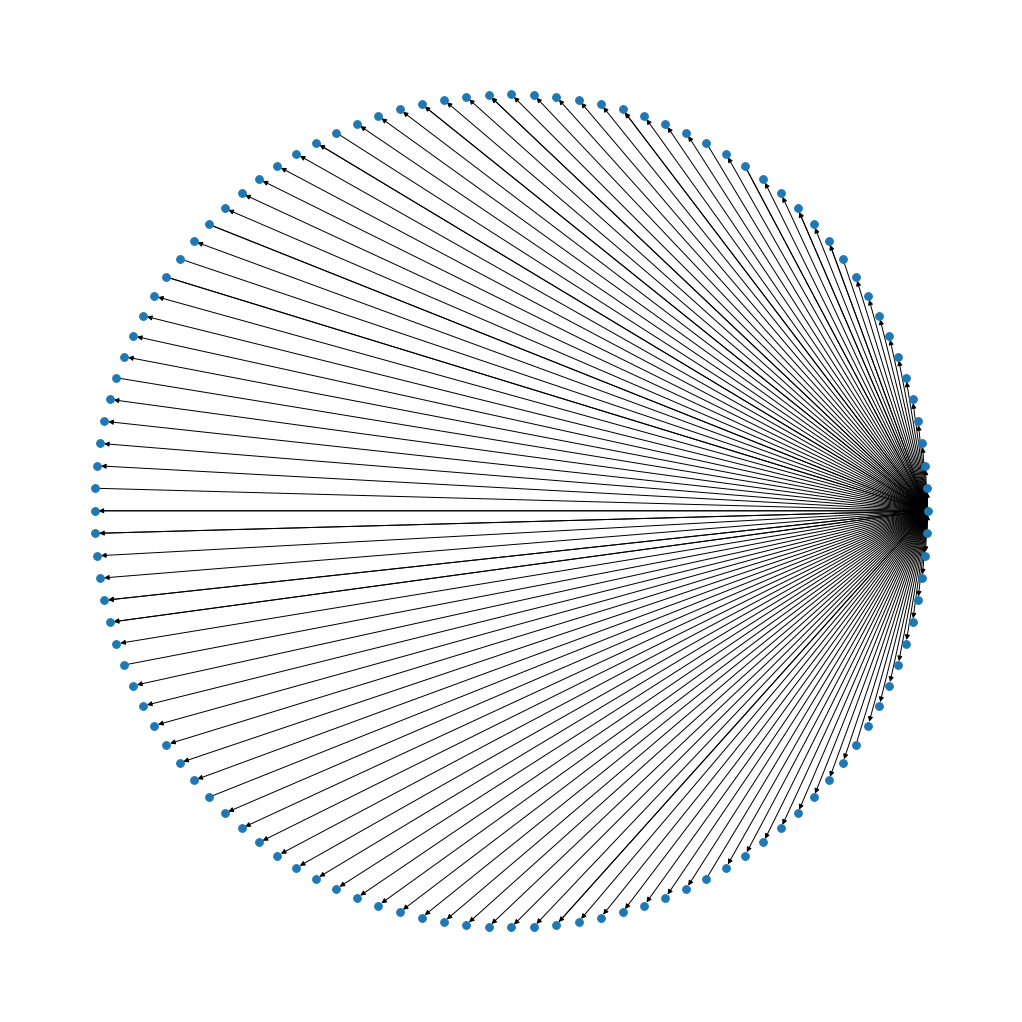

In [10]:
from rdflib.extras.external_graph_libs import *
from networkx import nx
import matplotlib.pyplot as plt

H = rdflib_to_networkx_multidigraph(g)
plt.figure(3,figsize=(14,14))
nx.draw_circular(H, node_size=60, font_size=8, with_labels=False)

Nu we het rdf omgezet hebben tot een Networkx Graph, kunnen we de functionaliteiten van Networkx gebruiken om wat berekeningen te doen hierover. 

In [11]:
print(nx.info(H))
def mean(values):
    return float(sum(values)) / max(len(values), 1)

print("Graph density:", nx.density(H))
print("Mean degree centrality value:", mean(nx.degree_centrality(H).values()))
print("Maximum degree centrality value:", max(nx.degree_centrality(H).values()))
print("Minimum degree centrality value:", min(nx.degree_centrality(H).values()))

print("\n")
try:
    list(nx.connected_components(H))
except:
    print("There are no viable connected components")
    pass

try:
    list(nx.betweenness_centrality(H))
except:
    print("There are no viable betweennes centralities")
    pass

try:
    list(nx.clustering(H))
except:
    print("There are no viable clusters")
    pass


Name: 
Type: MultiDiGraph
Number of nodes: 116
Number of edges: 130
Average in degree:   1.1207
Average out degree:   1.1207
Graph density: 0.009745127436281859
Mean degree centrality value: 0.019490254872563662
Maximum degree centrality value: 1.1391304347826088
Minimum degree centrality value: 0.008695652173913044


There are no viable connected components
There are no viable betweennes centralities
There are no viable clusters
